<a href="https://colab.research.google.com/github/sdingx/ml-cv/blob/main/finalproj_ml_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # image plotting
import time

from tensorflow.keras.preprocessing import image
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras

import os, glob


In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
path = '/content/drive/My Drive/S23-ML/final/'

train_generator = train_datagen.flow_from_directory(path+'data_train/', target_size = (64, 64), \
batch_size = 128, \
class_mode = "categorical")



Found 6584 images belonging to 2 classes.


In [ ]:
x_batch, y_batch = train_generator.next()
print(x_batch[0].shape)

(64, 64, 3)


In [ ]:
print('Shape of x_batch:', x_batch.shape)
print('Shape of y_batch:', y_batch.shape)

Shape of x_batch: (128, 64, 64, 3)
Shape of y_batch: (128, 2)


In [ ]:
num_classes = train_generator.num_classes
print("Number of classes:", num_classes)

Number of classes: 2


In [ ]:
y_batch = np.array([item[0] for item in y_batch])

## Building classifiers

In [ ]:
from keras import regularizers
from keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import ResNet50

base_model = ResNet50(input_shape=x_batch[0].shape, include_top=False, weights='imagenet')


# Freeze the base model layers to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Build your classifier model
classifier = keras.models.Sequential()
classifier.add(base_model)

# classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_batch[0].shape))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Conv2D(64, (3, 3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Conv2D(128, (3, 3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Flatten())

# classifier.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# classifier.add(Dropout(0.2))

classifier.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

classifier.add(Dropout(0.2))

classifier.add(Flatten())

# classifier.add(Dense(units=64, activation='relu'))

# classifier.add(Dropout(0.1))

# classifier.add(Dense(units=32, activation='relu'))

# classifier.add(Dropout(0.1))

classifier.add(Dense(units=16, activation='relu'))

classifier.add(Dropout(0.1))

classifier.add(Dense(units=1, activation='sigmoid'))



# Compile the model
optimizer = Adam(learning_rate=0.0001)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
classifier.summary()



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_66 (Flatten)        (None, 8192)              0         
                                                                 
 dense_211 (Dense)           (None, 256)               2097408   
                                                                 
 dropout_137 (Dropout)       (None, 256)               0         
                                                                 
 dense_212 (Dense)           (None, 128)               32896     
                                                                 
 dropout_138 (Dropout)       (None, 128)               0         
                                                                 
 flatten_67 (Flatten)        (None, 128)             

In [ ]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image
# make a prediction and add to results 
# test data path
path = '/content/drive/My Drive/S23-ML/final/'
img_dir = path+"data_test/" # Enter Directory of test set

# iterate over each test image
data_path = os.path.join(img_dir, '*g')

files = glob.glob(data_path)

print('there are', len(files), 'test files')

test_data = []
results = []

for f1 in files:
    img = image.load_img(f1, target_size=(64, 64))
    img = image.img_to_array(img)
    img = img / 255.0  # Rescale by 1/255
    img = np.expand_dims(img, axis=0)
    test_data.append(img)


test_res = pd.read_csv('/content/drive/My Drive/S23-ML/final/test_res.csv')
test_res = list(test_res['mask_cat'])

x_val, x_test, y_val, y_test = train_test_split(test_data, test_res, test_size=0.2, random_state=42)
y_val = np.array(y_val)
x_val = np.array(x_val).reshape(164, 64, 64, 3)
print('splitted test into 80% validation and 20% test')

there are 205 test files
splitted test into 80% validation and 20% test


In [ ]:
np.array(y_batch).shape

(128,)

In [ ]:
np.array(x_val).shape

(164, 64, 64, 3)

In [ ]:
# x_batch[0:2]

In [ ]:
# x_test[0:2]

In [ ]:
y_batch.shape

(128,)

In [ ]:
class_weights = {0: 1.0, 1: 1.0}

# y_val_reshaped = np.expand_dims(y_val, axis=1)

# Now x_val_encoded will have the same shape as y_val




fit_model = classifier.fit(x_batch, y_batch, steps_per_epoch=5, epochs=10, class_weight = class_weights, validation_data=(x_val, y_val))

Epoch 1/10
5/5 [==============================] - 6s 1s/step - loss: 3.1229 - accuracy: 0.5469 - val_loss: 3.0746 - val_accuracy: 0.5183
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 3.0208 - accuracy: 0.5859 - val_loss: 2.9948 - val_accuracy: 0.5122
Epoch 3/10
5/5 [==============================] - 4s 991ms/step - loss: 2.9399 - accuracy: 0.6016 - val_loss: 2.9215 - val_accuracy: 0.5244
Epoch 4/10
5/5 [==============================] - 4s 981ms/step - loss: 2.8482 - accuracy: 0.6641 - val_loss: 2.8522 - val_accuracy: 0.5488
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 2.8117 - accuracy: 0.5938 - val_loss: 2.7890 - val_accuracy: 0.5305
Epoch 6/10
5/5 [==============================] - 4s 1s/step - loss: 2.7413 - accuracy: 0.5703 - val_loss: 2.7289 - val_accuracy: 0.5244
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 2.6816 - accuracy: 0.6016 - val_loss: 2.6705 - val_accuracy: 0.5366
Epoch 8/10
5/5 [===================

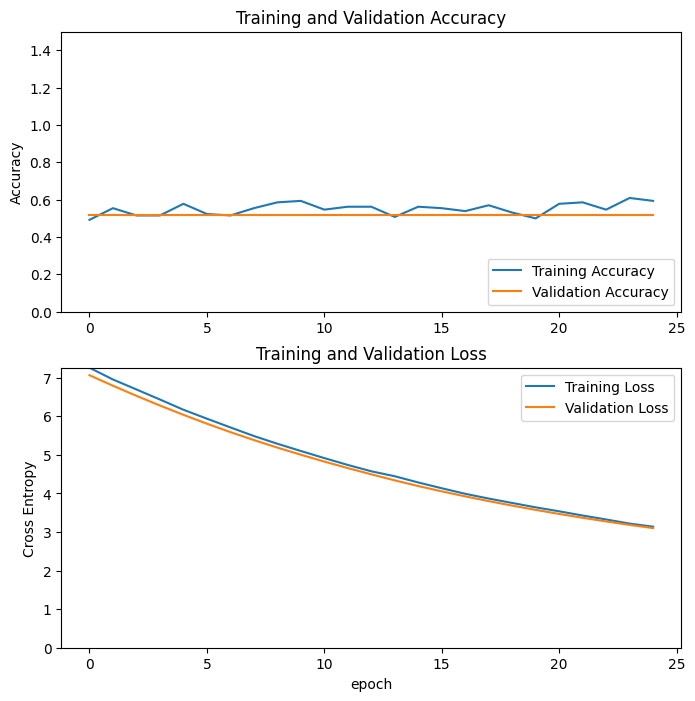

In [ ]:
acc = fit_model.history['accuracy']
val_acc = fit_model.history['val_accuracy']

loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.5])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(loss)])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# classifier.save(path+'resnet_best.h5')
# print("Saved model")

## Show sample images by category

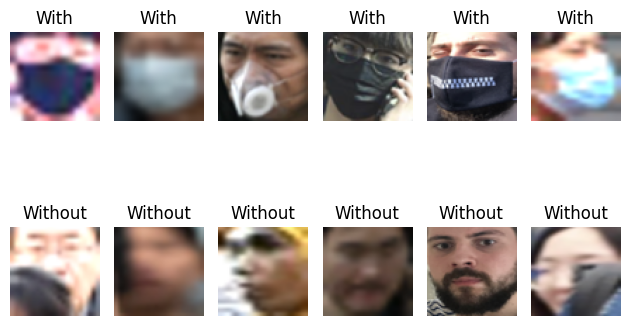

In [ ]:
from PIL import Image
path = '/content/drive/My Drive/S23-ML/final/data_train/'

# Create a list of image paths
with_mask_paths = [
    'with_mask/1488.png',
    'with_mask/1489.png',
    'with_mask/569.png',
    'with_mask/324.png',
    'with_mask/122.png',
    'with_mask/124.png'
]

without_mask_paths = [
    'without_mask/1491.png',
    'without_mask/1492.png',
    'without_mask/1493.png',
    'without_mask/324.png',
    'without_mask/344.png',
    'without_mask/125.png'
]

# Create a subplot for displaying the images
fig, axes = plt.subplots(2, 6)

# Loop through the image paths and display the images
for i, image_path in enumerate(with_mask_paths):
    # Open the image using PIL
    image = Image.open(path + image_path)
    
    # Resize the image to 64x64 pixels
    image = image.resize((64, 64))
    
    # Calculate the row and column indices for the current image
    row = 0
    col = i
    
    # Display the image on the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title('With')

# Loop through the image paths and display the images
for i, image_path in enumerate(without_mask_paths):
    # Open the image using PIL
    image = Image.open(path + image_path)
    
    # Resize the image to 64x64 pixels
    image = image.resize((64, 64))
    
    # Calculate the row and column indices for the current image
    row = 1
    col = i
    
    # Display the image on the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title('Without')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

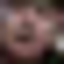

In [ ]:
path = '/content/drive/My Drive/S23-ML/final/data_train/'
# Open the image using PIL
image = Image.open(path+'without_mask/1488.png')

image = image.resize((64, 64))

# Display the image
image.show()

## Predicting on Test Set

395


In [ ]:


results = []
for img in x_test:
    # img = image.load_img(f1, target_size = (64, 64))
    # img = image.img_to_array(img)
    # img = np.expand_dims(img, axis = 0)
    # test_data.append(img)
    result = classifier.predict(img)
    r = np.argmax(result, axis=1)
    results.append(r[0])
    
print(results)

1/1 [==============================] - 0s 63ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
len(test_res)

395

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(results, y_test)

array([[16, 25],
       [ 0,  0]])

In [ ]:
accuracy_score(results, y_test)

0.3902439024390244

## Importing a random image, let it recognizes all faces first and see if they have masks

In [ ]:
path = '/content/drive/My Drive/S23-ML/final/'

classifier = keras.models.load_model(path + 'resnet_best.h5')
print("Loaded model")

Loaded model


In [ ]:
import cv2
# print version number
print(cv2.__version__)

4.7.0


1/1 [==============================] - 0s 95ms/step


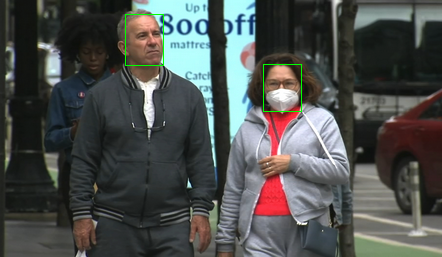

In [ ]:
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

path = '/content/drive/My Drive/S23-ML/final/'

# Define the path to the model file
model_path = path+'res10_300x300_ssd_iter_140000.caffemodel'
deploy_path = path+'deploy.prototxt'

# Load the model using OpenCV
net = cv2.dnn.readNetFromCaffe(deploy_path, model_path)

# Load the image
pic = imread(path+'sample_images/3.png')


# Create a blob from the image
blob = cv2.dnn.blobFromImage(cv2.resize(pic, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Set the input to the network
net.setInput(blob)

# Perform inference and obtain the face detections
detections = net.forward()

# Loop over the face detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.2:
        box = detections[0, 0, i, 3:7] * np.array([pic.shape[1], pic.shape[0], pic.shape[1], pic.shape[0]])
        (x, y, x2, y2) = box.astype(int)

        # Extract the face region from the image
        face = pic[y:y2, x:x2]
        img = cv2.resize(face, (64, 64))
        img = img.astype("float32") / 255.0
        img = np.expand_dims(img, axis = 0)
        result = classifier.predict(img)
        mask_prediction = np.argmax(result, axis=1)

        # Determine the color for the bounding box based on mask prediction
        if mask_prediction[0] == 0:
            color = (0, 255, 0)  # Green for masked people
        else:
            color = (0, 0, 255)  # Red for people without masks

        # Draw a rectangle over the face with the corresponding color
        cv2.rectangle(pic, (x, y), (x2, y2), color, 1)

# Show the image
cv2_imshow(pic)

# Wait for a key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()